**simple machine learning model for classification**

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
import pandas as pd
df1=pd.read_csv('dataset.csv')

In [ ]:
df1

,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0000,0.000000,0.000000,NaN,N
1,P1,0.387915,0.0000,-1.710853,0.000000,NaN,N
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
4,P1,0.398206,0.0000,-18.481272,8.040560,NaN,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0000,1.123600,2.421191,NaN,N
22003,P39,0.532207,0.0000,-4.091244,1.984920,NaN,N
22004,P39,0.501031,0.0000,-5.857833,1.010012,NaN,N
22005,P39,0.511827,0.0000,2.154771,1.493184,NaN,N


In [ ]:
##calculate nan values present in the data set##

In [ ]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = ((df1.isnull().sum()/len(df1))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df1[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
C6,21106,95.905848,float64


In [ ]:
## the describes the data set. but valid for only continous variables

In [ ]:
df1.describe()

,C2,C3,C4,C5,C6
count,22007.000000,22007.000000,22007.000000,22007.000000,901.0
mean,0.417560,0.012262,0.613107,2.494014,1.0
std,0.253368,0.085103,11.374086,5.584665,0.0
min,0.135146,0.000000,-85.450203,0.000000,1.0
25%,0.263494,0.000000,-3.429123,0.486256,1.0
50%,0.303054,0.000000,-0.136920,1.208030,1.0
75%,0.506786,0.000000,3.121814,2.745452,1.0
max,1.641544,1.336000,344.552351,146.158245,1.0


In [ ]:
###### question 1

In [ ]:
## this describes the dataset but for only categorical features

In [ ]:
df1.describe(include=object)

,C1,C7
count,22007,22007
unique,39,3
top,P6,N
freq,2217,21106


In [ ]:
## so we can see C7 conatains 3 unique category. lets see what the are

In [ ]:
df1.C7.unique()

array(['N', 'S', 'I'], dtype=object)

In [ ]:
## let us create 3 different dataframe for N,S,I. to see how they relate to C6

In [ ]:
dfs=df1[df1['C7']=='S']
dfs

,C1,C2,C3,C4,C5,C6,C7
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
668,P2,1.106672,0.2864,7.066163,4.225652,1.0,S
669,P2,1.045226,0.2864,-5.552271,1.957005,1.0,S
670,P2,1.105857,0.2864,5.800768,0.619465,1.0,S
...,...,...,...,...,...,...,...
21703,P39,0.945591,0.2369,-12.510519,12.026401,1.0,S
21853,P39,0.629905,0.1596,-8.621548,3.401927,1.0,S
21854,P39,1.028070,0.1596,63.210289,22.724290,1.0,S
21855,P39,0.932488,0.1596,-9.297242,13.449754,1.0,S


In [ ]:
#let us see if c6 contains any other value except 1

In [ ]:
dfs.C6.unique()

array([1.])

In [ ]:
dfs=df1[df1['C7']=='S']
dfs


,C1,C2,C3,C4,C5,C6,C7
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
668,P2,1.106672,0.2864,7.066163,4.225652,1.0,S
669,P2,1.045226,0.2864,-5.552271,1.957005,1.0,S
670,P2,1.105857,0.2864,5.800768,0.619465,1.0,S
...,...,...,...,...,...,...,...
21703,P39,0.945591,0.2369,-12.510519,12.026401,1.0,S
21853,P39,0.629905,0.1596,-8.621548,3.401927,1.0,S
21854,P39,1.028070,0.1596,63.210289,22.724290,1.0,S
21855,P39,0.932488,0.1596,-9.297242,13.449754,1.0,S


In [ ]:
dfn.C6.unique()

array([nan])

In [ ]:
dfi=df1[df1['C7']=='I']
dfi

,C1,C2,C3,C4,C5,C6,C7
640,P1,0.396344,0.3774,10.595758,8.196581,1.0,I
641,P1,0.519790,0.3774,31.146135,17.518175,1.0,I
642,P1,0.746883,0.3774,43.689390,27.477392,1.0,I
643,P1,1.058241,0.3774,41.687670,53.899902,1.0,I
644,P1,1.075354,0.3774,1.617172,95.150161,1.0,I
...,...,...,...,...,...,...,...
19706,P38,0.582631,0.2213,78.014906,68.625281,1.0,I
19707,P38,0.798432,0.2213,37.038953,58.965505,1.0,I
19708,P38,0.934530,0.2213,17.045683,57.641299,1.0,I
21851,P39,0.559466,0.1596,1.100819,2.167281,1.0,I


In [ ]:
dfi.C6.unique()

array([1.])

In [ ]:
### from above 3 rows we can see that c6 value 1 is unique with c7 value S and I
## nan value of c6 is unique with c7 value of N

In [ ]:
#since C6 has binary value. which means that nan values has to be replaced with 0.


In [ ]:
df1.fillna(0,inplace=True)

In [ ]:
df1

,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0000,0.000000,0.000000,0.0,N
1,P1,0.387915,0.0000,-1.710853,0.000000,0.0,N
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
4,P1,0.398206,0.0000,-18.481272,8.040560,0.0,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0000,1.123600,2.421191,0.0,N
22003,P39,0.532207,0.0000,-4.091244,1.984920,0.0,N
22004,P39,0.501031,0.0000,-5.857833,1.010012,0.0,N
22005,P39,0.511827,0.0000,2.154771,1.493184,0.0,N


In [ ]:
#### question 2

In [ ]:
## we have already created seperate dataframe for unique values of c7. so now we have to only count the rows present 
#in those dataframe to calculate percentage 


In [ ]:
print('no of rows in dataframe=',len(df1))
print('no of rows with N=',len(dfn))
print('no of rows with S=',len(dfs))
print('no of rows with I=',len(dfi))
print("percentage of N=",((len(dfn)/len(df1))*100))
print("percentage of S=",((len(dfs)/len(df1))*100))
print("percentage of I=",((len(dfi)/len(df1))*100))

no of rows in dataframe= 22007
no of rows with N= 21106
no of rows with S= 698
no of rows with I= 203
percentage of N= 95.90584813922842
percentage of S= 3.1717180896987323
percentage of I= 0.9224337710728404


In [ ]:
### question 3
 ## plot c5 wtr c7['N']

<AxesSubplot:ylabel='Frequency'>

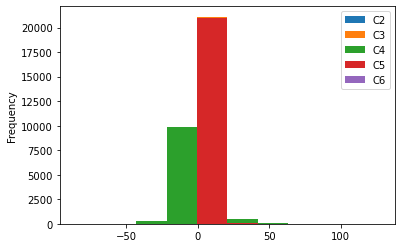

In [ ]:
dfn.plot.hist(by='C5', bins=10)

In [ ]:
### question 4


In [ ]:
df4=df1[(df1['C3']==0) & (df1['C6']==0)]
df4


,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0,0.000000,0.000000,0.0,N
1,P1,0.387915,0.0,-1.710853,0.000000,0.0,N
4,P1,0.398206,0.0,-18.481272,8.040560,0.0,N
5,P1,0.384828,0.0,-3.359605,7.487519,0.0,N
6,P1,0.399259,0.0,3.750137,6.172650,0.0,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0,1.123600,2.421191,0.0,N
22003,P39,0.532207,0.0,-4.091244,1.984920,0.0,N
22004,P39,0.501031,0.0,-5.857833,1.010012,0.0,N
22005,P39,0.511827,0.0,2.154771,1.493184,0.0,N


In [ ]:
print("count of person having C3 and C6 as 0 =",len(df4))

count of person having C3 and C6 as 0 = 21106


In [ ]:
### question 6


In [ ]:
df11=df1[['C4','C7']]
df11['count']=df11['C7']
df11
gdf1 = df11.groupby(["C7"])['count'].count()
gdf1=gdf1.to_frame()
gdf1.reset_index(inplace=True)
gdf11 = df11.groupby(["C7"])
gdf11=gdf11.mean()
gdf11.reset_index(inplace=True)
result = gdf1.merge(gdf11,left_on='C7', right_on='C7')
result.columns = ['C7', 'count','mean']
print("mean and count of target variable:")
result

mean and count of target variable:


C:\Users\kumar\AppData\Local\Temp/ipykernel_4404/789432269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['count']=df11['C7']


,C7,count,mean
0,I,203,17.512347
1,N,21106,0.194087
2,S,698,8.368522


In [ ]:
#### question 7

In [ ]:
d7=df1.pivot_table(columns=['C1'], aggfunc='size')
d7=d7.to_frame()
d7.reset_index(inplace=True)
s=d7[0].idxmax()
print("the person code that got highest number of entries in the dataset=",d7['C1'].iloc[s])

the person code that got highest number of entries in the dataset= P6


In [ ]:
### question 8

In [ ]:

d7=dfi.pivot_table(columns=['C1'], aggfunc='size')
d7=d7.to_frame()
d7.reset_index(inplace=True)
s=d7[0].idxmax()
print("the person code that got highest number of entries in the dataset=",d7['C1'].iloc[s])

the person code that got highest number of entries in the dataset= P3


In [ ]:
### question 9

In [ ]:
## the featuree c4 has negative value there for we can not use chi2 for determining feature importance 
## Feature importance is an inbuilt class that comes with Tree Based Classifiers, 
## we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df1.iloc[:,1:6]  #independent columns
y = df1.iloc[:,-1] 
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
d9=feat_importances.nlargest()
print("feature importance in descending order is given below:")
d9

feature importance in descending order is given below:


C6    0.685405
C3    0.193847
C2    0.044645
C5    0.040572
C4    0.035530
dtype: float64

In [ ]:
### question 10

In [ ]:
# A:
#ans:plot 3
# B:
#ans:plot 2
# c:
#ans:plot 4

In [ ]:
### question 11

In [ ]:
X = df1.C2
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
p=result[1]
print('')
if p<= 0.05:
    print('Data set is stationary')
else:
    print('Data set is non-stationary')

ADF Statistic: -7.637584
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Data set is stationary


In [ ]:
### question 12

In [ ]:
## first lets check if the dataset follows gausian distribution or not.
## if it follows gausian distribution then we will go for Standardize
## if it does not follow gausian distribution then we will go for normalization

array([[<AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'C3'}>],
       [<AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'C5'}>],
       [<AxesSubplot:title={'center':'C6'}>, <AxesSubplot:>]],
      dtype=object)

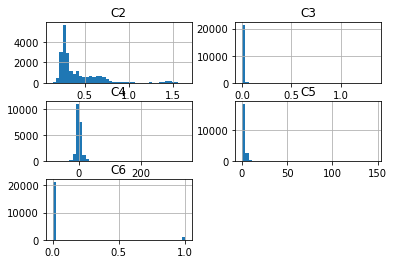

In [ ]:
df1.hist(bins=40)

In [ ]:
## we can see that dataset does not follow gausian distribution. so we will go for normalization

In [ ]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df1.iloc[:,1:6].values  #independent columns
y = df1.iloc[:,-1].values


In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y= label_encoder.fit_transform(y)
y

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [ ]:
label_encoder.classes_

array([0, 1, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[  0.25197357,   0.        ,   1.18723745,   0.45205645,
          0.        ],
       [  0.25460336,   0.        ,  -0.33204123,   0.789374  ,
          0.        ],
       [  0.27178021,   0.        ,  -1.84717656,   0.40085632,
          0.        ],
       ...,
       [  0.23554539,   0.        ,  28.66143741,   4.9280036 ,
          0.        ],
       [  1.45613283,   0.        ,   3.77356697,   0.06283814,
          0.        ],
       [  0.25553718,   0.        , -14.09127823,   0.25828858,
          0.        ]])

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
X_train_norm

array([[7.75544803e-02, 0.00000000e+00, 2.60938270e-01, 3.09292475e-03,
        0.00000000e+00],
       [7.93002254e-02, 0.00000000e+00, 2.55136675e-01, 5.40081742e-03,
        0.00000000e+00],
       [9.07028160e-02, 0.00000000e+00, 2.49350902e-01, 2.74261858e-03,
        0.00000000e+00],
       ...,
       [6.66488819e-02, 0.00000000e+00, 3.65852652e-01, 3.37169045e-02,
        0.00000000e+00],
       [8.76917421e-01, 0.00000000e+00, 2.70814560e-01, 4.29932201e-04,
        0.00000000e+00],
       [7.99201320e-02, 0.00000000e+00, 2.02594951e-01, 1.76718446e-03,
        0.00000000e+00]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  18,   10,   19],
       [   7, 4192,    7],
       [   9,   36,  104]], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.7276195068557655

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.6925455741212917